# Examination of the Stanford Open data for Conneticut. 

## Importing the modules and setting up directory:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
os.chdir('/home/zeski/Documents/Data_Science/DataSets/ProjectDataSets/Stanford/')
os.listdir()

['CA_2013_onwards.csv', 'CT.csv', 'CO.csv', 'DATA-README.md', 'AZ.csv']

## EDA and Cleaning:

In [3]:
CT= pd.read_csv('CT.csv')

print('This is the info for each column within the dataframe:\n')
print(CT.info())
print('\n============================================\n')
print('This is the info for the null values contained within each column:\n')
print(CT.isnull().sum())
print('\n============================================\n')
CT_clean= CT.loc[:,['id','stop_date','stop_time', 'county_name','police_department', 'driver_gender','driver_age','driver_race','search_conducted','search_type','is_arrested','stop_outcome','contraband_found','officer_id','stop_duration','violation']]

# Lets find the amount of unique counties, the unique pds, the unique officers. 

print('The counties are: ' + str(CT_clean['county_name'].unique()))
print('The police departments are: ' + str(CT_clean['police_department'].unique()))
print('The number of police officers involved are: ' + str(CT_clean['officer_id'].nunique()))

/home/zeski/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


This is the info for each column within the dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318669 entries, 0 to 318668
Data columns (total 24 columns):
id                       318669 non-null object
state                    318669 non-null object
stop_date                318669 non-null object
stop_time                318447 non-null object
location_raw             318628 non-null object
county_name              318627 non-null object
county_fips              318627 non-null float64
fine_grained_location    317006 non-null object
police_department        318669 non-null object
driver_gender            318669 non-null object
driver_age_raw           318669 non-null int64
driver_age               318395 non-null float64
driver_race_raw          318669 non-null object
driver_race              318669 non-null object
violation_raw            318669 non-null object
violation                318669 non-null object
search_conducted         318669 non-null bool
search_type_raw   

In [4]:
print('There is only one police department, so I will go ahead and drop that from the analysis.')
CT_clean.drop('police_department', axis='columns', inplace=True)
CT_clean.isnull().sum()
print('The rows county name and the driver age are going to be cruicial to our analysis, so I will remove the missing values!\n')
CT_clean.dropna(subset=['county_name','driver_age'], inplace=True)
CT_clean.isnull().sum()
print('\n============================================\n')
print('This a boolean slice finding the missing values of the DataFrame. I will go ahead and clear out these values from the dataframe, they all look to be interelated.')
print('This leads me to believe that it is a result of bad reporting.\n')
print('\n============================================\n')
print((CT_clean[CT_clean['stop_outcome'].isnull()]).head())
print('\n============================================\n')
print('Dropping the null values from the data frame:\n')
CT_clean.dropna(subset=['stop_outcome'],inplace=True)
print()
print(CT_clean.isnull().sum())

print('\n============================================\n')
print('These are the data types for the columns:\n')
print(CT_clean.dtypes)
CT_clean['driver_gender']=CT_clean.driver_gender.astype('category')
CT_clean['search_type']=CT_clean.search_type.astype('category')
CT_clean['is_arrested']=CT_clean.is_arrested.astype('bool')
CT_clean['stop_outcome']= CT_clean.stop_outcome.astype('category')
print('\n============================================\n')
print('These are the data types after conversion:\n')
print(CT_clean.dtypes)

There is only one police department, so I will go ahead and drop that from the analysis.
The rows county name and the driver age are going to be cruicial to our analysis, so I will remove the missing values!



This a boolean slice finding the missing values of the DataFrame. I will go ahead and clear out these values from the dataframe, they all look to be interelated.
This leads me to believe that it is a result of bad reporting.



                id   stop_date stop_time       county_name driver_gender  \
37   CT-2013-00038  2013-10-01     00:54  New Haven County             M   
102  CT-2013-00103  2013-10-01     05:06  New Haven County             M   
158  CT-2013-00159  2013-10-01     07:52   Hartford County             M   
167  CT-2013-00168  2013-10-01     08:35   Hartford County             M   
169  CT-2013-00170  2013-10-01     08:45   Hartford County             M   

     driver_age driver_race  search_conducted search_type is_arrested  \
37         22.0       White    

### Combining the datetime columns into a single column and converting to a datetime object.

In [56]:
datetime= CT_clean.stop_date.str.cat(CT_clean.stop_time, sep = ' ')
CT_clean['Date_Time']= pd.to_datetime(datetime)
CT_clean.set_index('Date_Time', inplace=True)

# Now let's begin analysis.


##  Stop Outcome by Race


Ticket is the most common stop outcome.
Verbal Warning is the 2nd most common stop outcome.
Written Warning is the 3rd most common stop outcome.
Summons is the 4th most common outcome.
Arrest is the 5th most common outcome.


White driver's are the most common stopped.
Black  driver's are the 2nd common stopped.
Hispanic  driver's are the 3rd most common stopped.
Asian driver's are the 4th most common stopped.
Other driver's are the 5th most common stopped.




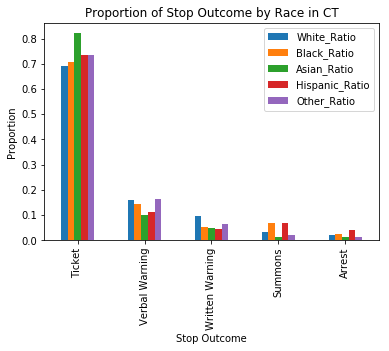

In [90]:
Outcomes=CT_clean.stop_outcome.value_counts()
Outcomes= pd.DataFrame(Outcomes)
Outcomes=Outcomes.reset_index()
# Again, We will have to look at the nan values and realize that the rows with nans had a True bool for is arrest.

place=1
for out in Outcomes['index']:
    if place == 1:
        print(str(out), 'is the most common stop outcome.')
        place+=1
    elif place == 2:
        print(str(out), 'is the 2nd most common stop outcome.')
        place += 1
    elif place == 3:
        print(str(out), 'is the 3rd most common stop outcome.')
        place+=1
    else:
        print(str(out),'is the', str(place)+'th most common outcome.')
        place+=1
    
print('\n===========================================================\n')
Driver_race=CT_clean.driver_race.value_counts()
Driver_race=pd.DataFrame(Driver_race)
Driver_race=Driver_race.reset_index()

place=1
for driver in Driver_race['index']:
    if place == 1:
        print(str(driver)+ " driver's are the most common stopped.")
        place+=1
    elif place == 2:
        print(str(driver), " driver's are the 2nd common stopped.")
        place += 1
    elif place == 3:
        print(str(driver), " driver's are the 3rd most common stopped.")
        place+=1
    else:
        print(str(driver)+ " driver's are the", str(place)+"th most common stopped.")
        place+=1
print('\n========================================================\n')

White= CT_clean[CT_clean.driver_race=='White']
Black= CT_clean[CT_clean.driver_race=='Black']
Hispanic=CT_clean[CT_clean.driver_race=='Hispanic']
Asian=CT_clean[CT_clean.driver_race=='Asian']
Other=CT_clean[CT_clean.driver_race=='Other']

WhitePerc=White.stop_outcome.value_counts(normalize=True)
BlackPerc=Black.stop_outcome.value_counts(normalize=True)
HispanicPerc= Hispanic.stop_outcome.value_counts(normalize=True)
AsianPerc=Asian.stop_outcome.value_counts(normalize=True)
OtherPerc=Other.stop_outcome.value_counts(normalize=True)

WhitePercdf=pd.DataFrame(WhitePerc)
BlackPercdf=pd.DataFrame(BlackPerc)
AsianPercdf=pd.DataFrame(AsianPerc)
HispanicPercdf=pd.DataFrame(HispanicPerc)
OtherPercdf=pd.DataFrame(OtherPerc)

WhitePercdf=WhitePercdf.reset_index()
BlackPercdf=BlackPercdf.reset_index()
AsianPercdf=AsianPerc.reset_index()
HispanicPercdf=HispanicPerc.reset_index()
OtherPercdf=OtherPerc.reset_index()

WhitePercdf.columns=['Offense_Outcome','White_Ratio']
BlackPercdf.columns=['Offense_Outcome','Black_Ratio']
AsianPercdf.columns=['Offense_Outcome','Asian_Ratio']
HispanicPercdf.columns=['Offense_Outcome','Hispanic_Ratio']
OtherPercdf.columns=['Offense_Outcome','Other_Ratio']

Total_Perc=pd.merge(WhitePercdf,BlackPercdf)
Total_Perc=pd.merge(Total_Perc,AsianPercdf)
Total_Perc=pd.merge(Total_Perc,HispanicPercdf)
Total_Perc=pd.merge(Total_Perc,OtherPercdf)

Total_Perc=Total_Perc.set_index('Offense_Outcome')
Total_Perc.col_name='Ratios'
Total_Perc.head()


Total_Perc.plot.bar(title='Race Proportions')
plt.title('Proportion of Stop Outcome by Race in CT')
plt.xlabel('Stop Outcome')
plt.ylabel('Proportion')
plt.show()


# Analysis of Stop Outcome

So looking at this, it can give an idea as to what the most likely outcome is going to be for each race. This shows that for all races, you are more likely to get a ticket.  However, for somebody who is african american or hispanic, you are more likely to receive a summons or even be arrested. The increase in percentage is minute, but still present and visible. It is interesting to note that caucasian people receive a greater proportion of verbal warnings and written warning than do drivers of other races. Whereas hispanics and african american have increased proportions for summons and arrests.

# Violation by Gender

In [11]:
print(CT_clean.violation.value_counts())

Speeding                                                        99832
Other                                                           85687
Registration/plates                                             36690
Moving violation                                                27574
Cell phone                                                      19874
Seat belt                                                       11916
Lights                                                          11895
Stop sign/light                                                  7009
Safe movement                                                    4970
Equipment                                                        2841
License                                                          2643
Other,Registration/plates                                         495
Other,Speeding                                                    425
Moving violation,Other                                            136
Lights,Other        

==========================

I want to slim down the categories of violations to fewer than what are present.

==========================

### Reducing the number of categories present

In [83]:
Reduce=pd.read_csv('CT.csv')
red=Reduce.loc[:,['id','violation']]

Id=[]
violation=[]
for ID in red.id:
    Id.append(ID)

for vio in red.violation:
    violation.append(vio)
    
violation2=[]
for vio in violation:
    if ',' in vio:
        vio='Multiple'
        violation2.append(vio)
    else:
        violation2.append(vio)


id_vio=tuple(zip(Id,violation2))
id_vio_dict={}
for ID,entry in id_vio:
    id_vio_dict[ID]=entry

NewVio=pd.Series(id_vio_dict, name='violation_updated')
NewVio.index.name='id'
Vioupdt=NewVio.reset_index()

CT_clean=pd.merge(CT_clean,Vioupdt, left_on='id',right_on='id')

/home/zeski/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Now to continue with analysis of Gender on types of violations

                     Female_proportion  Male_proportion
violation                                              
Speeding                      0.308381         0.324107
Other                         0.270244         0.275371
Registration/plates           0.128120         0.111629
Cell phone                    0.084682         0.052729
Moving violation              0.081318         0.091473
Lights                        0.037500         0.038234
Seat belt                     0.025947         0.044185
Stop sign/light               0.025890         0.020608
Safe movement                 0.016313         0.015649
License                       0.008161         0.008582
Multiple                      0.007116         0.006971
Equipment                     0.006328         0.010463


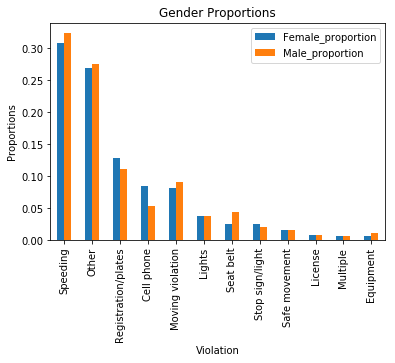

In [85]:
female= CT_clean[CT_clean['driver_gender']=='F']
male=CT_clean[CT_clean['driver_gender']=='M']

femalePerc=pd.DataFrame(female.violation_updated.value_counts(normalize=True))
malePerc=pd.DataFrame(male.violation_updated.value_counts(normalize=True))

femalePerc=femalePerc.reset_index()
malePerc=malePerc.reset_index()

femalePerc.columns=['violation','Female_proportion']
malePerc.columns=['violation','Male_proportion']

GenderViolations=pd.merge(femalePerc,malePerc,left_on='violation',right_on='violation')
GenderViolations=GenderViolations.set_index('violation')
print(GenderViolations)
GenderViolations.plot.bar(title='Gender Proportions')
plt.ylabel('Proportions')
plt.xlabel('Violation')
plt.show()

## Analysis of Violations by Gender:

Because of the large amount of stop outcomes in the original column, I had to examine the column in more detail to find out the unique outcomes. It looked like that the outcomes were being chained together for stops that had more than one violation cited. The plot looked sloppy if I continued ahead and utilized the vanilla info for the column. Therefore, I reduced the number of violation types to 12 by combining all the unique stops with chained violations into multiple as you can see in the above plot. Looking at the above chart, It seems that speeding is the highest proportion for both genders. We can see that males have a higher representation for speeding violations while females have a higher representaion for cell phone usage and registration/plate violations. Let look at the stop outcomes for these violations in the next plot

# Is there a correlation between gender and getting a speeding ticket?

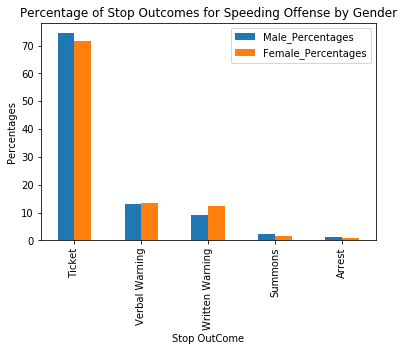

In [65]:
femaleSpeed = female[female.violation == 'Speeding']
FemSpeed= femaleSpeed.loc[:, ['driver_gender', 'violation', 'stop_outcome']]
maleSpeed = male[male.violation == 'Speeding']
MaleSpeed= maleSpeed.loc[:,['driver_gender', 'violation', 'stop_outcome']]

MaleProp=MaleSpeed.stop_outcome.value_counts(normalize=True)
MaleProp=pd.DataFrame(MaleProp)
MaleProp =MaleProp.reset_index()
MaleProp.columns = ['Speeding_Outcome', 'Male_Stop_Outcome']
MaleProp['Male_Percentages']=(MaleProp.Male_Stop_Outcome * 100)

FemProp=FemSpeed.stop_outcome.value_counts(normalize= True)
FemProp=pd.DataFrame(FemProp)
FemProp=FemProp.reset_index()
FemProp.columns = ['Speeding_Outcome','Female_Stop_Outcome']
FemProp['Female_Percentages'] = (FemProp.Female_Stop_Outcome * 100)


GenderSpeedOutcome=pd.merge(MaleProp, FemProp, left_on ='Speeding_Outcome', right_on='Speeding_Outcome')
GenderSpeedOutcome.drop(columns=['Male_Stop_Outcome','Female_Stop_Outcome'], inplace = True)
GenderSpeedOutcome=GenderSpeedOutcome.set_index('Speeding_Outcome')
GenderSpeedOutcome.plot.bar()

plt.title('Percentage of Stop Outcomes for Speeding Offense by Gender')
plt.xlabel('Stop OutCome')
plt.ylabel('Percentages')
plt.show()

## Analysis of Gender and Stop Outcomes:

After examining the violations for the genders, we can see the likelihoods of the stop outcomes for the genders above. Examining this, we can see that males are more likely to get a ticket than females. Both genders are equally likely to receive a verbal warning, however females are more likely to receive a written warning. This probably accounts for the disparities in the ticketed outcomes. While slim, males are more likely to receive a summons or be arrested. Looking back at the table before and the table below, the most ticketable offense is speeding. Depending on how fast the car is over the speed limit can be cause for serious fines and an automatic summons to court. Also, the search rate for males is over 2 times the rate for females. Depending on what is found within the car during a search, can play a huge role in determing an arrest or a summons.

# What is the relationship between Gender and searches?

In [66]:
SearchGender =CT_clean.groupby('driver_gender').search_conducted.mean()
SearchGender=pd.DataFrame(SearchGender)
SearchGender['search_conducted']=SearchGender['search_conducted'] * 100
print(SearchGender)

               search_conducted
driver_gender                  
F                      0.776225
M                      2.144548


This shows that for all traffic stops that 2.1 % of those stops for males, a search was conducted whereas for females, a search was only conducted 0.77% of the time.
This shows us that male drivers are searched nearly twice as often at traffic stops!

# Does Time of Day affect arrest rate? 


Combinning the time related columns into a datetime column and setting the  index

In [67]:
DateTime= CT_clean.stop_date.str.cat(CT_clean.stop_time, sep = ' ')
CT_clean['DateTime']= pd.to_datetime(DateTime)
CT_clean.set_index('DateTime', inplace=True)

### Hourly arrest rate.

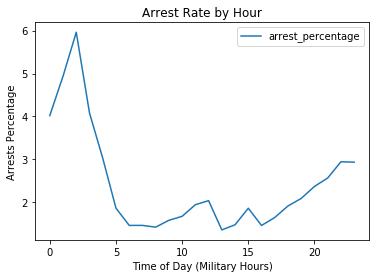

In [69]:
HourlyArrestR8=CT_clean.groupby(CT_clean.index.hour).is_arrested.mean()
HourlyArrestR8=pd.DataFrame(HourlyArrestR8)
HourlyArrestR8.columns = ['arrest_percentage']
HourlyArrestR8.arrest_percentage= HourlyArrestR8.arrest_percentage * 100


HourlyArrestR8.plot()
plt.xlabel('Time of Day (Military Hours)')
plt.ylabel('Arrests Percentage')
plt.title('Arrest Rate by Hour')
plt.show()

Looking at this chart above, we can see that time of day does play a significant role in the percentage of arrests. In the middle of the night, more arrests are likely to be made than during the day. What is interesting to note, is that this may be subject to bias of the cops, or could be due to other factors such as drunk driving, drug possession, less cars on the road providing less distractions, etc. 

### A look at arrests across the years.

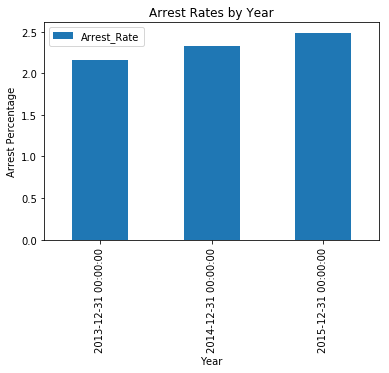

In [70]:
YearArrestR8=CT_clean.is_arrested.resample('A').mean()
YearArrestR8=pd.DataFrame(YearArrestR8)
YearArrestR8.columns =['Arrest_Rate']
YearArrestR8['Arrest_Rate']=YearArrestR8.Arrest_Rate * 100

YearArrestR8.plot.bar()
plt.xlabel('Year')
plt.ylabel('Arrest Percentage')
plt.title('Arrest Rates by Year')
plt.show()

Examining this chart, there is a clear indication that as the years go by the arrest rate also climbs.

# Lets look at the average stop durations to see how long you might be stopped for.

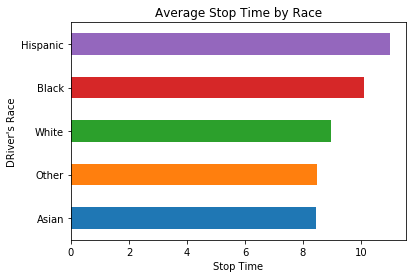

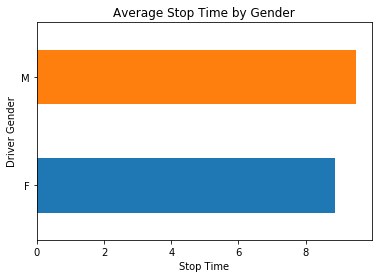

In [77]:
mapp={
    '1-15 min':7.5,
    '16-30 min':23,
    '30+ min': 45
}

CT_clean['Stop_Duration_Map']= CT_clean.stop_duration.map(mapp)

RaceStop= CT_clean.groupby('driver_race').Stop_Duration_Map.mean()

RaceStop.sort_values().plot(kind='barh')
plt.title('Average Stop Time by Race')
plt.xlabel('Stop Time')
plt.ylabel("DRiver's Race")
plt.show()

GenderStop=CT_clean.groupby('driver_gender').Stop_Duration_Map.mean()
GenderStop.sort_values().plot(kind='barh')
plt.title('Average Stop Time by Gender')
plt.xlabel('Stop Time')
plt.ylabel('Driver Gender')
plt.show()

Finally looking at the final two charts, we can see the disparities betweens the average time a member of the represented demographics groups will be stopped for. It seems that while males are more likely to get a summons, arrested, or a ticket, they are also more likely to be stopped for alonger period of time. Furthermore, if we examine the top graph, we can see that while african americans and hispanics are far more likely to receive a summons or arrest. They too are more likely to be stopped for a longer period of time. The length in which an individual are stopped could have a direct corrrelation on the stop outcome considering that the longer the stop time could be a result of a police officer conducting a search.